In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
reviews_df = pd.read_json('../data/Musical_Instruments_5.json', lines=True)

In [7]:
reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [8]:
reviews_df.shape

(10261, 9)

In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


<Axes: xlabel='overall', ylabel='count'>

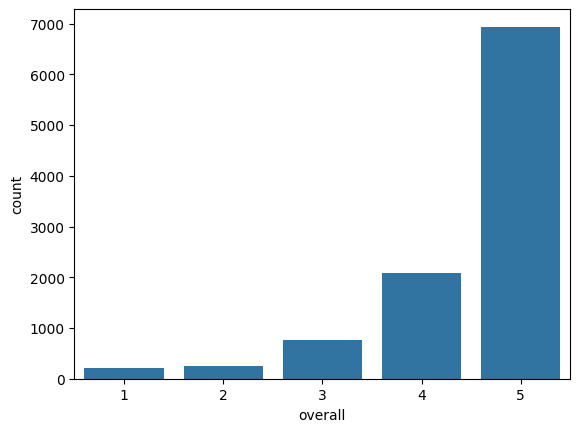

In [10]:
sns.countplot(data = reviews_df, x='overall')

In [14]:
balanced_corpus = pd.concat([
    reviews_df[reviews_df['overall'] == 1].sample(500, replace=True),
    reviews_df[reviews_df['overall'] == 2].sample(500, replace=True),
    reviews_df[reviews_df['overall'] == 3].sample(500, replace=True),
    reviews_df[reviews_df['overall'] == 4].sample(500, replace=True),
    reviews_df[reviews_df['overall'] == 5].sample(500, replace=True)
])

In [15]:
balanced_corpus['overall'].value_counts()

overall
1    500
2    500
3    500
4    500
5    500
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

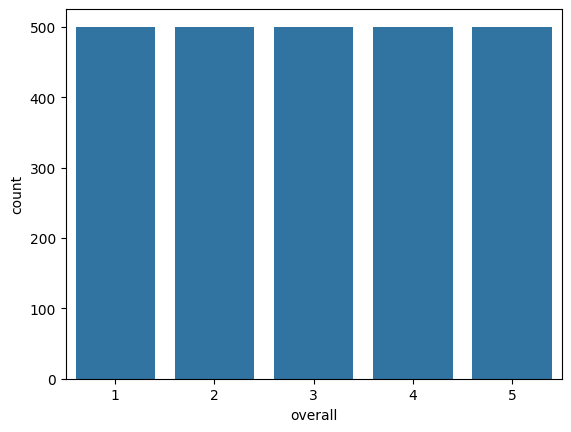

In [16]:
sns.countplot(data=balanced_corpus, x='overall')

In [17]:
sample_5K_revs = reviews_df.sample(n=5000, random_state=42)

In [18]:
balanced_corpus.to_csv('../data/balanced_corpus.csv', index=False)
sample_5K_revs.to_csv('../data/sample_5K_revs.csv', index=False)